# Praktik Klasifikasi: KNN, Naive Bayes, SVM dengan Dataset Iris

Notebook ini berisi contoh lengkap klasifikasi menggunakan Python dan **dataset Iris**.

- Dataset: Bunga Iris (tersedia di sklearn)
- Model: K-Nearest Neighbors (KNN), Naive Bayes, Support Vector Machine (SVM)
- Evaluasi: Confusion Matrix, Accuracy, Precision, Recall, F1-Score
- Bonus: Cara simpan dan load dataset ke/dari CSV

---

## 1. Menyiapkan Dataset (Iris)
---

In [1]:
# Import library
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset iris dari sklearn
iris = load_iris()
X = iris.data
y = iris.target

# Ubah ke DataFrame untuk kemudahan eksplorasi & simpan ke CSV
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (Opsional) Simpan Dataset ke CSV
Gunakan ini jika ingin latihan membaca dataset dari file.

In [2]:
# Simpan dataset ke file CSV
df.to_csv('iris.csv', index=False)
# Untuk latihan, kamu bisa memuatnya lagi dengan pd.read_csv('iris.csv')

## 2. Split Data: Train & Test
--

In [3]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}')

Train size: 120, Test size: 30


## 3. Klasifikasi dengan K-Nearest Neighbors (KNN)
---

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi dan training model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediksi data test
y_pred_knn = knn.predict(X_test)

## 4. Klasifikasi dengan Naive Bayes
---

In [5]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan training model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi data test
y_pred_nb = nb.predict(X_test)

## 5. Klasifikasi dengan Support Vector Machine (SVM)
---

In [6]:
from sklearn.svm import SVC

# Inisialisasi dan training model SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Prediksi data test
y_pred_svm = svm.predict(X_test)

## 6. Evaluasi Model
---

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluasi(y_test, y_pred, nama_model):
    print(f'===== {nama_model} =====')
    print('Akurasi :', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

evaluasi(y_test, y_pred_knn, 'KNN')
evaluasi(y_test, y_pred_nb, 'Naive Bayes')
evaluasi(y_test, y_pred_svm, 'SVM')

===== KNN =====
Akurasi : 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


===== Naive Bayes =====
Akurasi : 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


===== SVM =====
Akurasi : 1.0
Confusion Matrix:
 [[10  0

## 7. Bonus: Visualisasi Confusion Matrix
---

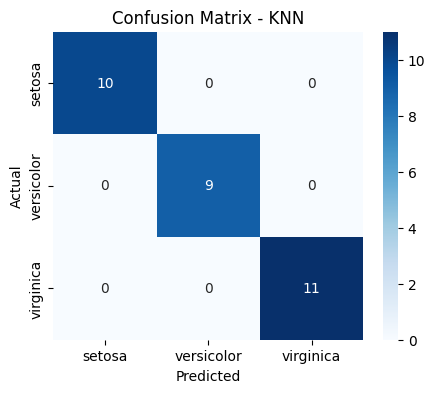

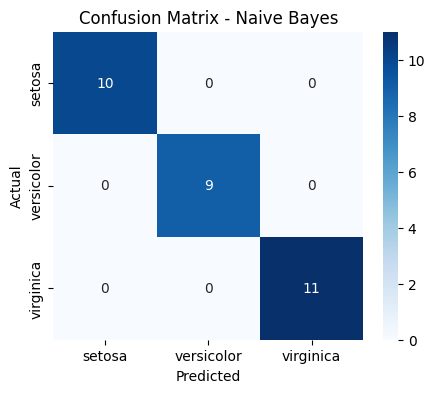

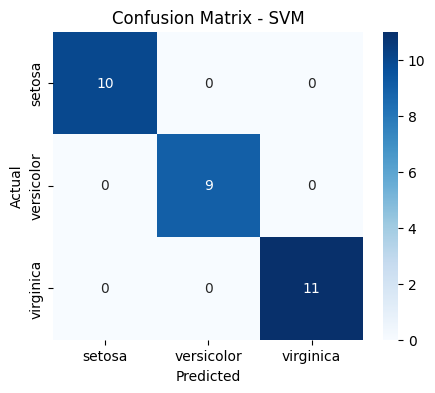

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cm(y_true, y_pred, model):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

plot_cm(y_test, y_pred_knn, 'KNN')
plot_cm(y_test, y_pred_nb, 'Naive Bayes')
plot_cm(y_test, y_pred_svm, 'SVM')

## 8. (Opsional) ROC Curve & AUC untuk SVM (multi-class)
---

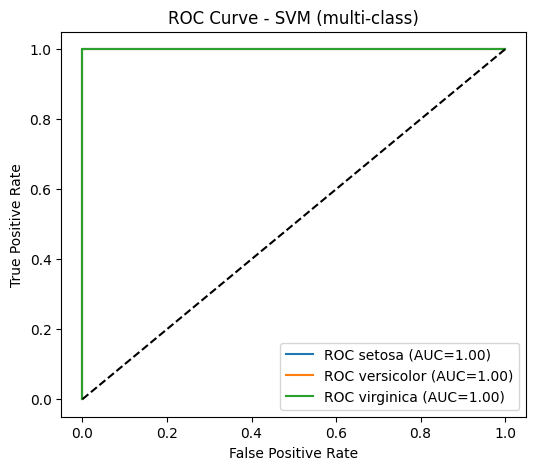

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Karena Iris terdiri dari 3 kelas, perlu di-binarize untuk ROC multi-class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score_svm = svm.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(6,5))
for i, label in enumerate(iris.target_names):
    plt.plot(fpr[i], tpr[i], label=f'ROC {label} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (multi-class)')
plt.legend()
plt.show()

---

### Selesai!
Sekarang kamu sudah bisa mencoba berbagai algoritma klasifikasi dasar di Python.

- Kamu bisa ganti model, parameter, dan dataset sesuai kebutuhan.
- Eksplorasi lebih jauh dan diskusikan hasilnya di Space!

Selamat belajar! 🚀